In [81]:
import cv2 as cv
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from helpers.features import read_offset_csv, preprocess, transform_offsets_to_paths, show_image
from helpers.features import detect_keypoints_and_descriptors
from helpers.features import detect_keypoints_and_descriptors_orb, detect_keypoints_and_descriptors_akaze, detect_keypoints_and_descriptors_brisk
from helpers.features import precision_recall_total, cross_match

In [2]:
shuuchin1 = read_offset_csv("annotations/shuuchinbukan-1.csv")
shuuchin2 = read_offset_csv("annotations/shuuchinbukan-2.csv")
shuuchin3 = read_offset_csv("annotations/shuuchinbukan-3.csv")

In [3]:
shuuchin1_paths = transform_offsets_to_paths(shuuchin1)
shuuchin2_paths = transform_offsets_to_paths(shuuchin2)
shuuchin3_paths = transform_offsets_to_paths(shuuchin3)

In [4]:
def calculate_or_load_matches(path_h5, data_paths_df, detect_fn):
    if os.path.exists(path_h5):
        return pd.read_hdf(path_h5, "default")
    else:
        detect_time, (keypoints, descriptors) = detect_fn(data_paths_df)
        print("Getting all descriptors took", detect_time, "seconds.")
        match_time_s, matches_df = cross_match(descriptors)
        print("Getting all the cross matches took", match_time_s, "seconds.")
        matches_df.to_hdf(path_h5, key="default", mode="w", complevel=9)
        return matches_df

## Shuuchin1

### ORB

In [5]:
matches_shuuchin1_orb = calculate_or_load_matches("results/matches_shuuchin1_orb.h5", shuuchin1_paths, detect_keypoints_and_descriptors_orb)

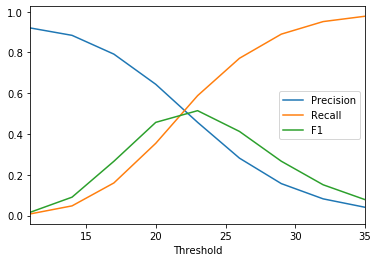

In [6]:
pr_shuuchin1_orb = precision_recall_total(matches_shuuchin1_orb, 11, 36, 3)
pr_shuuchin1_orb.plot()

### AKAZE UPRIGHT

In [7]:
matches_shuuchin1_akaze_upright = calculate_or_load_matches("results/matches_shuuchin1_akaze_upright.h5", shuuchin1_paths, detect_keypoints_and_descriptors_akaze)

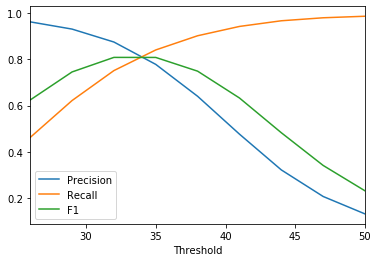

In [8]:
pr_shuuchin1_akaze_upright = precision_recall_total(matches_shuuchin1_akaze_upright, 26, 51, 3)
pr_shuuchin1_akaze_upright.plot()

### AKAZE

In [9]:
akaze = cv.AKAZE_create(descriptor_size=0, threshold=0.008)
matches_shuuchin1_akaze = calculate_or_load_matches("results/matches_shuuchin1_akaze.h5", shuuchin1_paths, lambda x: detect_keypoints_and_descriptors(x, akaze))

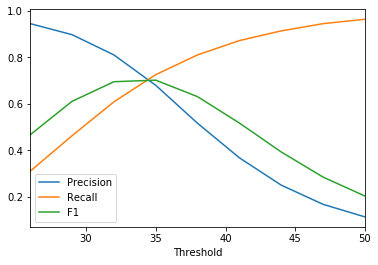

In [10]:
pr_shuuchin1_akaze = precision_recall_total(matches_shuuchin1_akaze, 26, 51, 3)
pr_shuuchin1_akaze.plot()

### BRISK

In [11]:
matches_shuuchin1_brisk = calculate_or_load_matches("results/matches_shuuchin1_brisk.h5", shuuchin1_paths, detect_keypoints_and_descriptors_brisk)

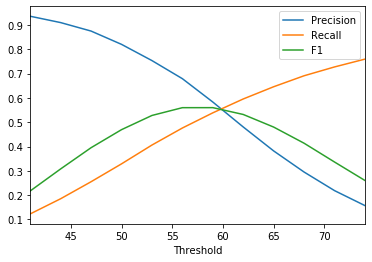

In [12]:
pr_shuuchin1_brisk = precision_recall_total(matches_shuuchin1_brisk, 41, 76, 3)
pr_shuuchin1_brisk.plot()

## Shuuchin2

### ORB

In [13]:
matches_shuuchin2_orb = calculate_or_load_matches("results/matches_shuuchin2_orb.h5", shuuchin2_paths, detect_keypoints_and_descriptors_orb)

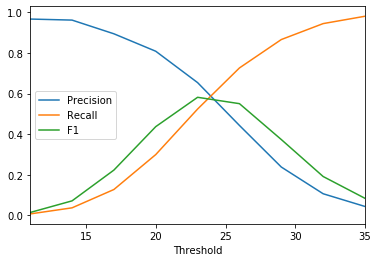

In [14]:
pr_shuuchin2_orb = precision_recall_total(matches_shuuchin2_orb, 11, 36, 3)
pr_shuuchin2_orb.plot()

### AKAZE UPRIGHT

In [15]:
matches_shuuchin2_akaze_upright = calculate_or_load_matches("results/matches_shuuchin2_akaze_upright.h5", shuuchin2_paths, detect_keypoints_and_descriptors_akaze)

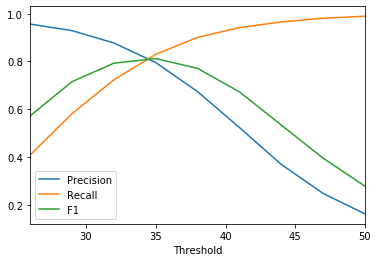

In [16]:
pr_shuuchin2_akaze_upright = precision_recall_total(matches_shuuchin2_akaze_upright, 26, 51, 3)
pr_shuuchin2_akaze_upright.plot()

### AKAZE

In [17]:
matches_shuuchin2_akaze = calculate_or_load_matches("results/matches_shuuchin2_akaze.h5", shuuchin2_paths, lambda x: detect_keypoints_and_descriptors(x, akaze))

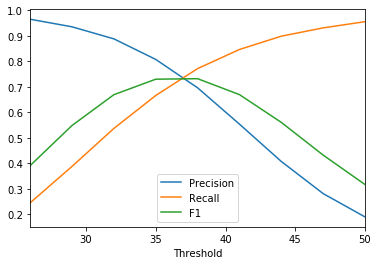

In [18]:
pr_shuuchin2_akaze = precision_recall_total(matches_shuuchin2_akaze, 26, 51, 3)
pr_shuuchin2_akaze.plot()

### BRISK

In [19]:
matches_shuuchin2_brisk = calculate_or_load_matches("results/matches_shuuchin2_brisk.h5", shuuchin2_paths, detect_keypoints_and_descriptors_brisk)

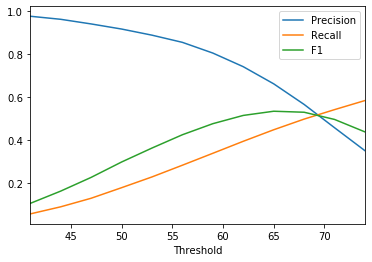

In [20]:
pr_shuuchin2_brisk = precision_recall_total(matches_shuuchin2_brisk, 41, 76, 3)
pr_shuuchin2_brisk.plot()

## Shuuchin3

### ORB

In [21]:
matches_shuuchin3_orb = calculate_or_load_matches("results/matches_shuuchin3_orb.h5", shuuchin3_paths, detect_keypoints_and_descriptors_orb)

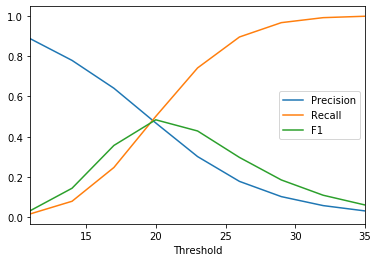

In [22]:
pr_shuuchin3_orb = precision_recall_total(matches_shuuchin3_orb, 11, 36, 3)
pr_shuuchin3_orb.plot()

### AKAZE UPRIGHT

In [23]:
matches_shuuchin3_akaze_upright = calculate_or_load_matches("results/matches_shuuchin3_akaze_upright.h5", shuuchin3_paths, detect_keypoints_and_descriptors_akaze)

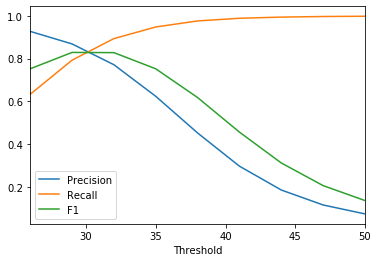

In [24]:
pr_shuuchin3_akaze_upright = precision_recall_total(matches_shuuchin3_akaze_upright, 26, 51, 3)
pr_shuuchin3_akaze_upright.plot()

### AKAZE

In [25]:
matches_shuuchin3_akaze = calculate_or_load_matches("results/matches_shuuchin3_akaze.h5", shuuchin3_paths, lambda x: detect_keypoints_and_descriptors(x, akaze))

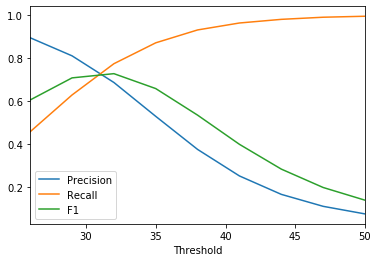

In [26]:
pr_shuuchin3_akaze = precision_recall_total(matches_shuuchin3_akaze, 26, 51, 3)
pr_shuuchin3_akaze.plot()

### BRISK

In [27]:
matches_shuuchin3_brisk = calculate_or_load_matches("results/matches_shuuchin3_brisk.h5", shuuchin3_paths, detect_keypoints_and_descriptors_brisk)

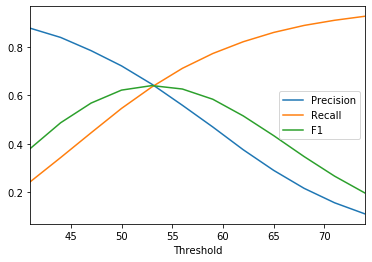

In [28]:
pr_shuuchin3_brisk = precision_recall_total(matches_shuuchin3_brisk, 41, 76, 3)
pr_shuuchin3_brisk.plot()

## Total
Getting statistics from all the above matches.

In [29]:
pr_shuuchin1_orb_zoom = precision_recall_total(matches_shuuchin1_orb, 18, 25, 1)
pr_shuuchin2_orb_zoom = precision_recall_total(matches_shuuchin2_orb, 18, 25, 1)
pr_shuuchin3_orb_zoom = precision_recall_total(matches_shuuchin3_orb, 18, 25, 1)

In [30]:
pr_shuuchin1_akaze_upright_zoom = precision_recall_total(matches_shuuchin1_akaze_upright, 28, 38, 1)
pr_shuuchin2_akaze_upright_zoom = precision_recall_total(matches_shuuchin2_akaze_upright, 28, 38, 1)
pr_shuuchin3_akaze_upright_zoom = precision_recall_total(matches_shuuchin3_akaze_upright, 28, 38, 1)

In [31]:
pr_shuuchin1_akaze_zoom = precision_recall_total(matches_shuuchin1_akaze, 30, 38, 1)
pr_shuuchin2_akaze_zoom = precision_recall_total(matches_shuuchin2_akaze, 30, 38, 1)
pr_shuuchin3_akaze_zoom = precision_recall_total(matches_shuuchin3_akaze, 30, 38, 1)

In [32]:
pr_shuuchin1_brisk_zoom = precision_recall_total(matches_shuuchin1_brisk, 52, 72, 1)
pr_shuuchin2_brisk_zoom = precision_recall_total(matches_shuuchin2_brisk, 52, 72, 1)
pr_shuuchin3_brisk_zoom = precision_recall_total(matches_shuuchin3_brisk, 52, 72, 1)

In [33]:
def find_optimal_precision_recall(*pr_dfs):
    pr_concat = pd.concat(pr_dfs, axis=1, keys=["Shuuchin1", "Shuuchin2", "Shuuchin3"])
    pr_concat_mean = pr_concat.groupby(axis=1, level=1).mean().drop("F1", axis=1)
    pr_f1 = pr_concat_mean.apply(lambda x: (2 * x["Precision"] * x["Recall"]) / (x["Precision"] + x["Recall"]), axis=1)
    f1_max_id = pr_f1.idxmax()
    return pr_concat_mean.loc[f1_max_id]

In [34]:
pr_orb_optimal = find_optimal_precision_recall(pr_shuuchin1_orb_zoom, pr_shuuchin2_orb_zoom, pr_shuuchin3_orb_zoom)

In [35]:
pr_akaze_upright_optimal = find_optimal_precision_recall(pr_shuuchin1_akaze_upright_zoom, pr_shuuchin2_akaze_upright_zoom, pr_shuuchin3_akaze_upright_zoom)

In [36]:
pr_akaze_optimal = find_optimal_precision_recall(pr_shuuchin1_akaze_zoom, pr_shuuchin2_akaze_zoom, pr_shuuchin3_akaze_zoom)

In [37]:
pr_brisk_optimal = find_optimal_precision_recall(pr_shuuchin1_brisk_zoom, pr_shuuchin2_brisk_zoom, pr_shuuchin3_brisk_zoom)

In [102]:
pr = pd.concat([pr_orb_optimal, pr_akaze_upright_optimal, pr_akaze_optimal, pr_brisk_optimal], axis=1)
pr.columns = [f"ORB\n(t: {pr.columns[0]})", f"AKAZE\nUPRIGHT\n(t: {pr.columns[1]})", f"AKAZE\n(t: {pr.columns[2]})", f"BRISK\n(t: {pr.columns[3]})"]

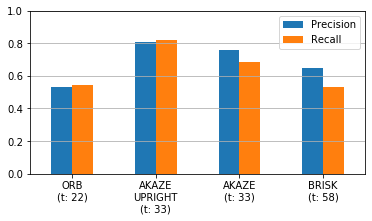

In [118]:
pr.T.plot.bar(ylim=(0,1), figsize=(6, 3))
plt.grid(axis="y")
plt.xticks(rotation=0)
#plt.savefig("keypoints_optimal.pdf", transparent=True, bbox_inches="tight")

In [49]:
pr_orb_long = precision_recall_total(matches_shuuchin1_orb, 10, 81, 2)
pr_akaze_upright_long = precision_recall_total(matches_shuuchin1_akaze_upright, 10, 81, 2)
pr_akaze_long = precision_recall_total(matches_shuuchin1_akaze, 10, 81, 2)
pr_brisk_long = precision_recall_total(matches_shuuchin1_brisk, 10, 81, 2)

In [50]:
pr_concat_long = pd.DataFrame([pr_orb_long["F1"], pr_akaze_upright_long["F1"], pr_akaze_long["F1"], pr_brisk_long["F1"]], index=["ORB", "AKAZE UPRIGHT", "AKAZE", "BRISK"])

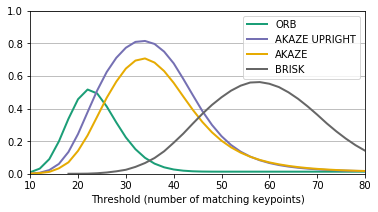

In [117]:
pr_concat_long.T.plot(figsize=(6, 3), ylim=(0, 1), xlim=(10, 80), cmap=cm.get_cmap("Dark2"), linewidth=2)
plt.xlabel("Threshold (number of matching keypoints)")
plt.grid(axis="y")
#plt.savefig("keypoints_f1.svg", transparent=True, bbox_inches="tight")